<a href="https://www.kaggle.com/code/kberkek00/income-classification?scriptVersionId=287494490" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('income_evaluation.csv')

In [91]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [92]:
df.shape

(32561, 15)

In [93]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [94]:
col_names = ["age","workclass","final_weight","education","education_num",
             "marital_status","occupation","relationship","race","sex",
            "capital_gain","capital_loss","hours_per_week","native_country","income"]

In [95]:
df.columns = col_names

In [96]:
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [98]:
for col in df.columns:
    if df[col].dtype == "O":
        print(col)

workclass
education
marital_status
occupation
relationship
race
sex
native_country
income


In [99]:
for col in df.columns:
    if df[col].dtype != "O":
        print(col)

age
final_weight
education_num
capital_gain
capital_loss
hours_per_week


In [100]:
categorical = [col for col in df.columns if df[col].dtype == "O"]
numerical = [col for col in df.columns if df[col].dtype != "O"]

In [101]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [102]:
numerical

['age',
 'final_weight',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [103]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [104]:
df[numerical].head()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [105]:
for col in categorical:
    print(f"------------------{col}------------------------")
    print(df[col].value_counts())

------------------workclass------------------------
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
------------------education------------------------
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
------------------marital_status------------------------
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spo

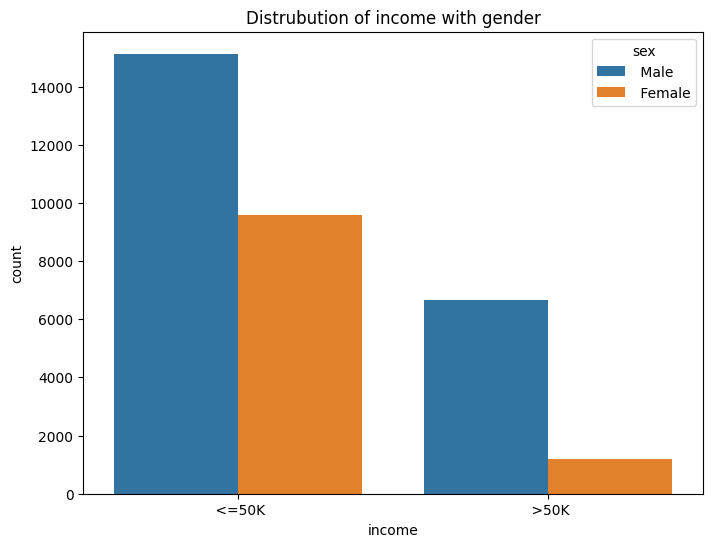

In [106]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x=df["income"],hue=df["sex"],data=df)
ax.set_title("Distrubution of income with gender")
plt.show()



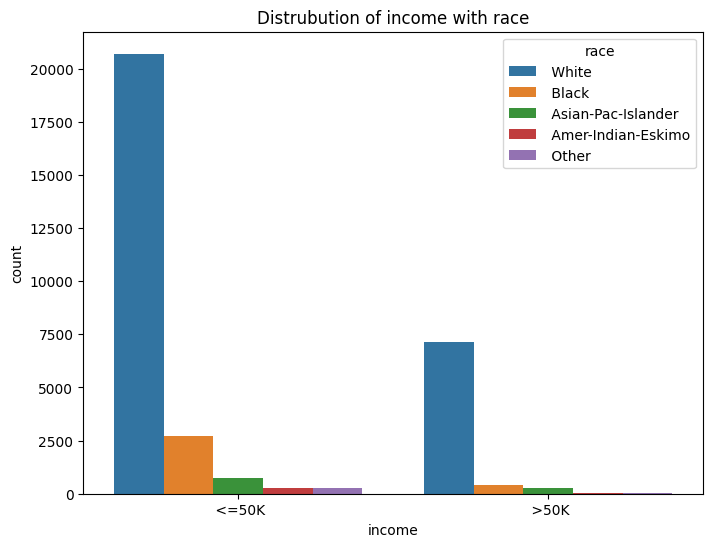

In [107]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x=df["income"],hue=df["race"],data=df)
ax.set_title("Distrubution of income with race")
plt.show()

In [108]:
over_40_hours = df[df["hours_per_week"] > 40]
under_40_hours = df[df["hours_per_week"] <= 40]

In [109]:
over_40_hours.value_counts('income')

income
<=50K    5725
>50K     3856
Name: count, dtype: int64

In [110]:
under_40_hours.value_counts('income')

income
<=50K    18995
>50K      3985
Name: count, dtype: int64

In [111]:
# 40 saatten fazla çalışan insanların %40 ı 50k dolardan fazla geliri var.
3856 / (5725+3856)

0.4024632084333577

In [112]:
#40 saatten az çalışan insanların %17 si 50k dolardan fazla geliri var
3985 / (18995+3985)

0.17341166231505656

In [114]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [116]:
for col in categorical:
    print(f"-------------{col}-------------")
    print(df[col].unique())

-------------workclass-------------
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
-------------education-------------
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
-------------marital_status-------------
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
-------------occupation-------------
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
-------------relationship-------------
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
-------------race-------------
[' 

In [121]:
for col in categorical:
    unique_values = df[col].unique()

    if " ?" in unique_values:
        print(col)

workclass
occupation
native_country


In [122]:
for col in categorical:
    unique_values = df[col].unique()

    if " ?" in unique_values:
        df[col] = df[col].replace(" ?",np.nan)
        

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [127]:
df.isnull().sum()

age                  0
workclass         1836
final_weight         0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

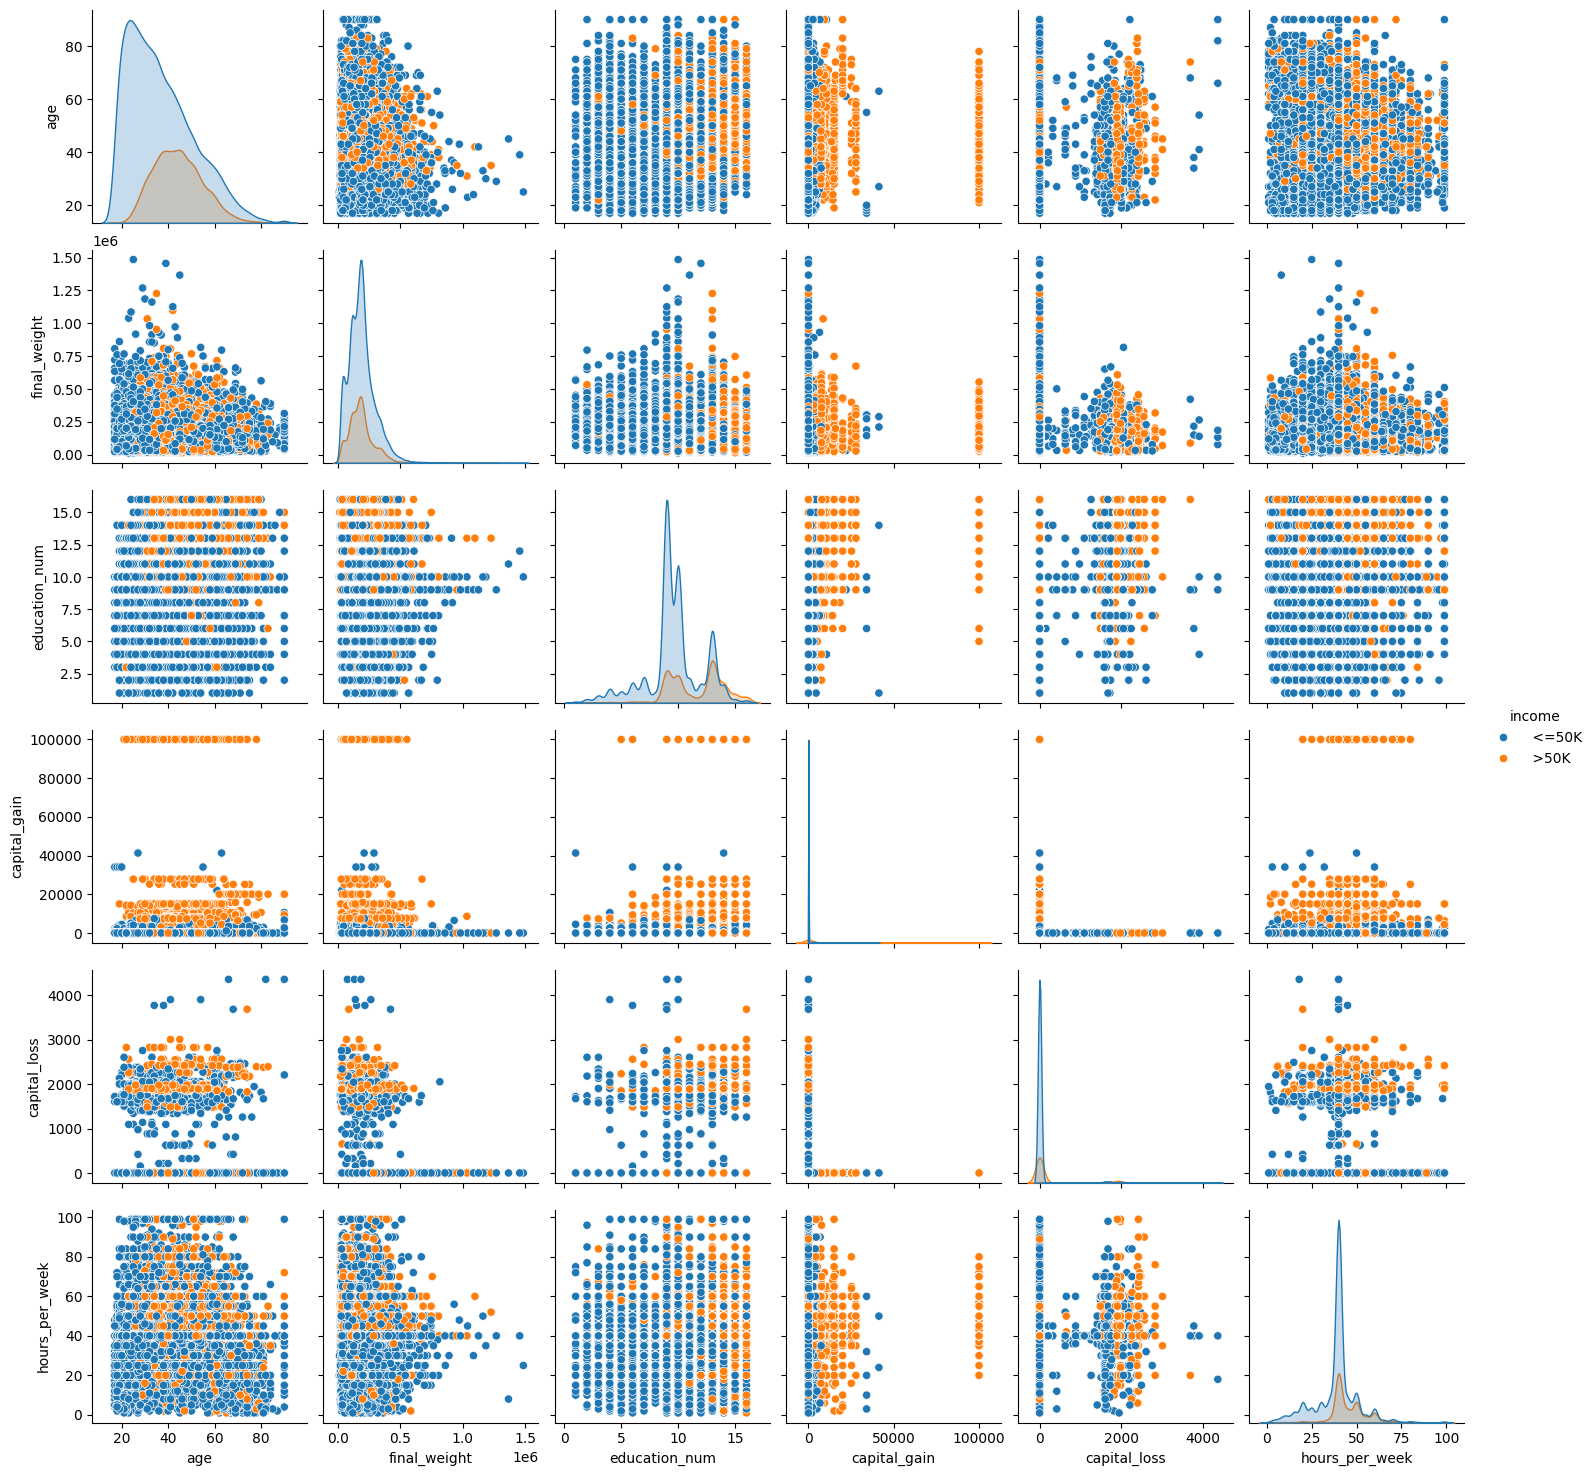

In [129]:
sns.pairplot(hue="income",data=df)
plt.show()

In [130]:
X = df.drop('income',axis=1)
y = df['income']

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [132]:
categorical = [col for col in X_train.columns if X_train[col].dtype == "O"]

In [133]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [134]:
X_train[categorical].isnull().sum()

workclass         1262
education            0
marital_status       0
occupation        1265
relationship         0
race                 0
sex                  0
native_country     392
dtype: int64

In [135]:
X_test[categorical].isnull().sum()

workclass         574
education           0
marital_status      0
occupation        578
relationship        0
race                0
sex                 0
native_country    191
dtype: int64

In [137]:
X_train["workclass"].mode()[0]

' Private'

In [138]:
for i in [X_train,X_test]:
    i["workclass"] = i["workclass"].fillna(X_train["workclass"].mode()[0])
    i["occupation"] = i["occupation"].fillna(X_train["occupation"].mode()[0])
    i["native_country"] = i["native_country"].fillna(X_train["native_country"].mode()[0])

In [140]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32174,Self-emp-not-inc,Bachelors,Never-married,Sales,Not-in-family,White,Male,United-States
2680,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,El-Salvador
10874,Private,Some-college,Widowed,Exec-managerial,Unmarried,White,Female,United-States
25028,Private,9th,Married-civ-spouse,Craft-repair,Husband,Other,Male,Mexico
25881,Self-emp-inc,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States


In [141]:
df[categorical].nunique()

workclass          8
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
native_country    41
dtype: int64

In [143]:
y_train_binary = y_train.apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [145]:
target_means = y_train_binary.groupby(X_train["native_country"]).mean()

In [147]:
X_train["native_country_encoded"] = X_train["native_country"].map(target_means)
X_train["native_country_encoded"] = X_train["native_country_encoded"].fillna(y_train_binary.mean())

X_test["native_country_encoded"] = X_test["native_country"].map(target_means)
X_test["native_country_encoded"] = X_test["native_country_encoded"].fillna(y_train_binary.mean())

In [148]:
X_train.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,native_country_encoded
32174,44,Self-emp-not-inc,157217,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,42,United-States,0.247311
2680,26,Local-gov,336969,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,28,El-Salvador,0.129032
10874,53,Private,233369,Some-college,10,Widowed,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,0.247311
25028,30,Private,348618,9th,5,Married-civ-spouse,Craft-repair,Husband,Other,Male,0,0,40,Mexico,0.062907
25881,50,Self-emp-inc,140516,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0.247311


In [149]:
X_train = X_train.drop('native_country', axis=1)
X_test = X_test.drop("native_country", axis=1)

In [151]:
one_hot_categories = [
    'workclass',
    'education',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex'
]

In [152]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [156]:
encoder = ColumnTransformer(
    transformers= [
        ('cat', OneHotEncoder(handle_unknown="ignore", sparse_output=False),one_hot_categories)    
    ],remainder='passthrough'
)

In [157]:
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [158]:
X_train_encoded

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.20000000e+01, 2.47311312e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.80000000e+01, 1.29032258e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+01, 2.47311312e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e+01, 2.47311312e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.57900000e+03, 4.00000000e+01, 2.47311312e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+01, 2.47311312e-01]],
      shape=(22792, 65))

In [161]:
columns = encoder.get_feature_names_out()

In [162]:
X_train = pd.DataFrame(X_train_encoded, columns=columns, index=X_train.index)
X_test = pd.DataFrame(X_test_encoded, columns=columns, index = X_test.index)

In [163]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__final_weight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
32174,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,44.0,157217.0,13.0,0.0,0.0,42.0,0.247311
2680,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,26.0,336969.0,13.0,0.0,0.0,28.0,0.129032
10874,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,53.0,233369.0,10.0,0.0,0.0,40.0,0.247311
25028,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,30.0,348618.0,5.0,0.0,0.0,40.0,0.062907
25881,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,50.0,140516.0,13.0,0.0,0.0,40.0,0.247311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,36.0,376455.0,11.0,0.0,0.0,38.0,0.247311
2693,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,24.0,145964.0,13.0,0.0,0.0,40.0,0.247311
8076,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,50.0,136913.0,9.0,0.0,0.0,50.0,0.247311
20213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,25.0,182227.0,9.0,0.0,1579.0,40.0,0.247311


In [164]:
 X_test

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__final_weight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
10125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,47.0,182752.0,9.0,0.0,0.0,35.0,0.423077
11478,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,73.0,161027.0,3.0,0.0,0.0,20.0,0.247311
4224,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,18.0,152182.0,10.0,0.0,0.0,25.0,0.247311
6592,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,66.0,284021.0,9.0,0.0,0.0,40.0,0.247311
21910,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,39.0,261504.0,8.0,0.0,0.0,40.0,0.247311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31624,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,29.0,261725.0,13.0,0.0,0.0,35.0,0.247311
1488,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,57.0,278763.0,9.0,0.0,0.0,40.0,0.247311
8725,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,48.0,334409.0,13.0,0.0,0.0,50.0,0.247311
11150,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,37.0,302604.0,10.0,0.0,0.0,40.0,0.247311


In [165]:
cols = X_train.columns

In [168]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [169]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [170]:
X_train = pd.DataFrame(X_train, columns=cols)

In [171]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__final_weight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.35,-0.175622,1.000000,0.0,0.0,0.4,0.000000
1,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.55,1.335801,1.000000,0.0,0.0,-2.4,-0.118279
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.80,0.464693,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,-0.35,1.433750,-1.666667,0.0,0.0,0.0,-0.184405
4,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.65,-0.316050,1.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.05,1.667814,0.333333,0.0,0.0,-0.4,0.000000
22788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.65,-0.270241,1.000000,0.0,0.0,0.0,0.000000
22789,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.65,-0.346345,-0.333333,0.0,0.0,2.0,0.000000
22790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.60,0.034672,-0.333333,0.0,1579.0,0.0,0.000000


In [173]:
X_test = pd.DataFrame(X_test,columns=cols)

In [174]:
X_test

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__final_weight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.50,0.039086,-0.333333,0.0,0.0,-1.0,0.175766
1,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.80,-0.143586,-2.333333,0.0,0.0,-4.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.95,-0.217958,0.000000,0.0,0.0,-3.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,1.45,0.890594,-0.333333,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.10,0.701263,-0.666667,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.40,0.703121,1.000000,0.0,0.0,-1.0,0.000000
9765,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,1.00,0.846383,-0.333333,0.0,0.0,0.0,0.000000
9766,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.55,1.314276,1.000000,0.0,0.0,2.0,0.000000
9767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.00,1.046847,0.000000,0.0,0.0,0.0,0.000000


In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rfc = RandomForestClassifier(n_estimators= 10 , random_state=15)
rfc.fit(X_train,y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [177]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [178]:
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8538233186610708
[[6950  494]
 [ 934 1391]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7444
        >50K       0.74      0.60      0.66      2325

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



In [179]:
from sklearn.model_selection import RandomizedSearchCV

In [180]:
rf_params = {
    "n_estimators" : [10,100,200,500,1000],
    "max_depth" : [5,8,10,15,None],
    "max_features" : ["sqrt","log2",5,6,7,8],
    "min_samples_split" : [2,8,15,20]
}

In [181]:
rfc = RandomForestClassifier()

In [182]:
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params,cv=3,n_jobs=-1)

In [183]:
rscv.fit(X_train,y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [5, 8, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_split': [2, 8, ...], 'n_estimators': [10, 100, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [184]:
y_pred = rscv.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8648786979219981
[[7057  387]
 [ 933 1392]]
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7444
        >50K       0.78      0.60      0.68      2325

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.80      9769
weighted avg       0.86      0.86      0.86      9769

